## Mónica Villasuso López.
### Kaggle competition 08 - Oct 2020 al 12-Oct-2020

## Facial Expression Recognition

Guess whether these people are feeling good or not regarding their faces. 👍 👎

It is believed that a human has at least 8 basics emotions, where sadness and happiness are the ones the people usually talk more about. For the human being is kind of an easy job to find out how a person is feeling by the expression on their face. But this time you should train a Neural Network, using the layers and params you may find necessaries in order to get the highest accuracy, differentiating between sad and happy people.

You're right, people can feel more than one emotion at a time but, let's forget about it for a sec and try to simplify the problem.

The pictures are already in black and white, have a 48x48x3 size and have the faces cropped, what should makes everything a little easier. However, feel free to make any changes to the pictures, but remember to make the same kind of treatment to the train set of images and the test set of images, just before you make the predictions.

In case you don't already know, this is a problem of classification, with two classes.

Are you happy? Are you sad?
Let your NN find it out for you. 

In [1]:
# Manejo de archivos y directorios
import os
from os import listdir
from os.path import isfile, join
from utils.files import rename_filename, file_exists
# Librerías básicas (álgebra, números aleatorios, carga de datos en dataframe, visualizacion)
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import shuffle
# Para cargar  y mostrar imágenes
import imageio
# Librerias para modelos de redes neuronales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [2]:
os.chdir('/Users/purbina/Desktop/THE_BRIDGE/DS_MVL/PROYECTOS/Entregas_Ejercicios_MVL/Deep_Learning_Exercises/KAGGLE091020_competition/how-am-i-feeling/to_train/to_train/happy')


In [3]:
# Prueba de lectura de las imágenes
#import cv2
#im2 = imageio.imread('00007.jpg')
#im2.shape  # im is a numpy array
#imageio.imwrite('im2_gray.jpg', im2[:, :, 0])   # Guarda la imagen en Blanco y Negro
#im2_r = cv2.resize(im2, (32, 32) )  #Redimensiona la imagen a 32x32
#im2_r.shape

In [4]:
# Crea una lista con los nombres de las fotos "happy" para entrenar el modelo
# excluye .DS_Store y directorios
happyfiles =  [f for f in os.listdir('.') if (os.path.isfile(f)) and (not f.startswith('.'))] 
len(happyfiles) 

3285

In [5]:
expresion=[]        #Lista donde se cargaran las expresiones corresp a las fotos (0 - Sadness, 1 Happy)

In [6]:
# Carga las imágenes  del directorio en la lista X_data_img
X_data_img =[]
for file in happyfiles:
    imagen = imageio.imread(file)
    X_data_img.append(imagen)
    expresion.append(1)     #  1 = "Happy"

In [7]:
os.chdir('/Users/purbina/Desktop/THE_BRIDGE/DS_MVL/PROYECTOS/Entregas_Ejercicios_MVL/Deep_Learning_Exercises/KAGGLE091020_competition/how-am-i-feeling/to_train/to_train/sadness')

In [8]:
# Crea una lista con los nombres de las fotos "sad" para entrenar el modelo
# excluye .DS_Store y directorios
sadfiles =  [f for f in os.listdir('.') if (os.path.isfile(f)) and (not f.startswith('.'))] 
len(sadfiles) 

2891

In [9]:
for file in sadfiles:
    imagen = imageio.imread(file)
    X_data_img.append(imagen)
    expresion.append(0)     #  0 = "Sad"

In [10]:
# (Lista con los nombres de todas las fotos para entrenar el modelo)
allfiles = happyfiles + sadfiles
len(allfiles)      

6176

In [11]:
random.seed(50)
#Shuffle de las 3 listas (conservando la relacion)
mapindexpos = list(zip(X_data_img,expresion,allfiles))
random.shuffle(mapindexpos)
X_data_img,expresion,allfiles = zip(*mapindexpos)

In [12]:
# Convertir la lista a np array
X = np.squeeze(X_data_img)
X.shape

(6176, 48, 48)

In [13]:
# Normalizacion de los datos
X = X.astype('float32')
X /= 255

In [14]:
# Setting del tamaño del conjunto de entrenamiento
t_size=0.85
train_size = int(len(X) * t_size)

In [15]:
# Partición del conjunto de entrenamiento y test para entrenar el modelo
(train_images, train_labels), (test_images, test_labels) = (X[:train_size],np.array(expresion[:train_size])) , (X[train_size:] , np.array(expresion[train_size:]))
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((5249, 48, 48), (5249,), (927, 48, 48), (927,))

In [16]:
# Nombres de las clases (target)
class_names = ['sad','happy']

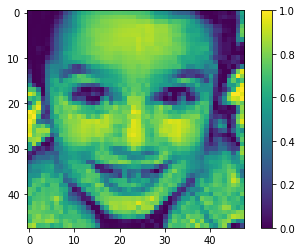

In [17]:
# Muestra primera imagen del conjunto de entrenamiento  
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images.shape

(5249, 48, 48)

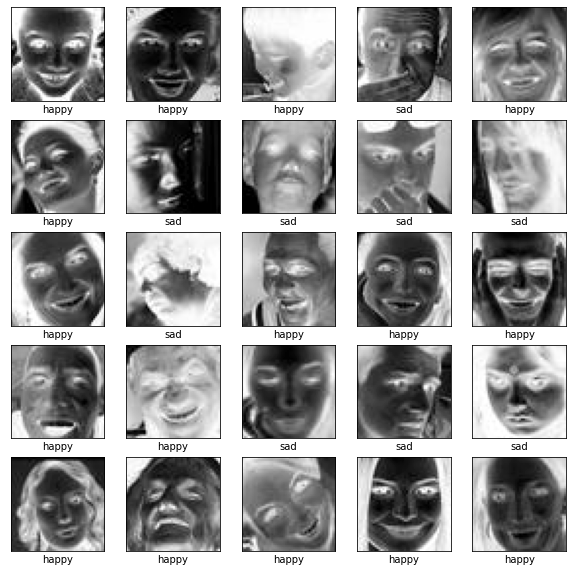

In [19]:
# Muestra las primeras 25 imagenes del conjunto de entrenamiento 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
train_images_gr = train_images.reshape(train_images.shape[0], 48, 48, 1)
test_images_gr = test_images.reshape(test_images.shape[0], 48, 48, 1)

print("train_images_gr shape:", train_images_gr.shape)
print("test_images_gr shape:", test_images_gr.shape)

train_images_gr shape: (5249, 48, 48, 1)
test_images_gr shape: (927, 48, 48, 1)


### MODELO 

EL MEJOR accuracy se alcanzó con la siguientes características:  

Settings:  
Random seed = 50  
%Train = 85%  (Usando validation_split = 15%)
----------  
Función de activación --> RELU   (en todas las capas)  
Optimizador --> Adam  
----------  
Una CNN con:  
    - 1 capa convolutiva con 8 neuronas  
    - 1 capa convolutiva con 16 neuronas  
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad --> pool size (2,2)  
    - 1 capa convolutiva con 32 neuronas    
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad --> pool size (2,2)  
    - 1 dropout 0.25  
    - 1 Flatten  
    - 1 dense con 16 neuronas  
    - 1 dense con 32 neuronas  
    - 1 dense con 2 (Softmax --> salida)


In [21]:
tf.config.run_functions_eagerly(True)

INPUT_SHAPE = (48,48,1)

model2 = keras.models.Sequential()

# First conv-pool layers - set 1
model2.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), 
activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model2.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid"))
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model2.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid"))
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model2.add(keras.layers.Dropout(rate=0.25))

# Flatten layer
model2.add(keras.layers.Flatten())

# Dense layers
model2.add(keras.layers.Dense(units=16, activation="relu"))
model2.add(keras.layers.Dense(units=32, activation="relu"))
# Output layer
model2.add(keras.layers.Dense(units=2, activation="softmax"))
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

In [22]:
# Compilar el modelo
# Distintos valores probados para el optimizador : (adam, RMSprop, AdaMax, Adadelta, Adagrad)
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


In [24]:
history = model2.fit(train_images_gr, train_labels, epochs=20, validation_split=0.20, verbose=1, callbacks=[early_stop])

Epoch 1/20
132/132 [==============================] - 26s 197ms/step - loss: 0.6866 - accuracy: 0.5504 - val_loss: 0.6626 - val_accuracy: 0.6171
Epoch 2/20
132/132 [==============================] - 29s 220ms/step - loss: 0.6223 - accuracy: 0.6485 - val_loss: 0.5627 - val_accuracy: 0.7114
Epoch 3/20
132/132 [==============================] - 33s 247ms/step - loss: 0.5517 - accuracy: 0.7242 - val_loss: 0.5394 - val_accuracy: 0.7305
Epoch 4/20
132/132 [==============================] - 25s 192ms/step - loss: 0.5096 - accuracy: 0.7528 - val_loss: 0.4861 - val_accuracy: 0.7667
Epoch 5/20
132/132 [==============================] - 38s 284ms/step - loss: 0.4834 - accuracy: 0.7630 - val_loss: 0.4638 - val_accuracy: 0.7857
Epoch 6/20
132/132 [==============================] - 28s 214ms/step - loss: 0.4388 - accuracy: 0.7919 - val_loss: 0.4856 - val_accuracy: 0.7543
Epoch 7/20
132/132 [==============================] - 28s 211ms/step - loss: 0.4217 - accuracy: 0.8000 - val_loss: 0.4493 - val_ac

In [25]:
test_loss, test_acc = model2.evaluate(test_images_gr,  test_labels, verbose=2)

print('\nTest accuracy:', round(test_acc,7)*100 , "%")

29/29 - 1s - loss: 0.4802 - accuracy: 0.8101

Test accuracy: 81.01403 %


### PREDICCIONES

In [91]:
predictions = model2.predict(test_images_gr)

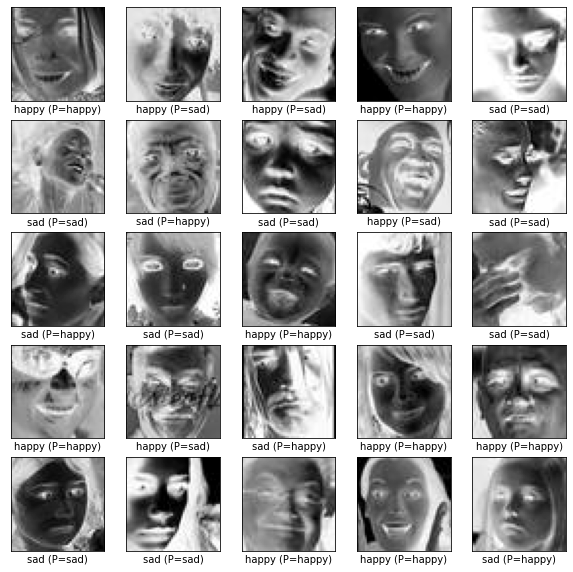

In [93]:
# VER IMAGENES DE TEST (las primeras 25) vs. (P= LO QUE PREDIJO EL MODELO )
# NOTA: (Predictions es un array de 2 posiciones con la probabilidad de que el sentimiento de  la imagen sea alguna de los esperados (Sad or Happy). Se toma la posicion de la que tenga mayor probabilidad )
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    pred_modelo = np.where(max(predictions[i])==predictions[i])[0][0]
    plt.xlabel(class_names[test_labels[i]] + " (P=" +class_names[pred_modelo] + ")")
plt.show()

# PREDICCION CONJUNTO DE TEST - KAGGLE

Cargar los datos a predecir, formatearlos de igual manera que  al conjunto de train. Hacer la prediccion y generar la salida para subirla a kaggle

In [214]:
to_pred = pd.read_csv("/Users/purbina/Desktop/THE_BRIDGE/DS_MVL/PROYECTOS/Entregas_Ejercicios_MVL/Deep_Learning_Exercises/KAGGLE091020_competition/how-am-i-feeling/test_set.csv")

In [215]:
lpred=to_pred.path.to_list()

In [216]:
path = "/Users/purbina/Desktop/THE_BRIDGE/DS_MVL/PROYECTOS/Entregas_Ejercicios_MVL/Deep_Learning_Exercises/KAGGLE091020_competition/how-am-i-feeling/to_pred/"

In [217]:
X_data_pred=[]

In [218]:
for file in lpred:
    im_pred = imageio.imread(path + file)
    X_data_pred.append(im_pred)

In [219]:
Xpred = np.squeeze(X_data_pred)
Xpred = Xpred.astype('float32')
Xpred /= 255
Xpred_gr = Xpred.reshape(Xpred.shape[0], 48, 48, 1)
Xpred_gr.shape

(4117, 48, 48, 1)

In [220]:
predictions = model2.predict(Xpred_gr)

In [221]:
pred_modelo=[]
for i in range(len(predictions)):
    pred_modelo.append(np.where(max(predictions[i])==predictions[i])[0][0])

In [222]:
res = pd.Series(pred_modelo).map({0: "sadness", 1:"happy"})

In [223]:
to_pred['result'] = res

In [224]:
to_pred

,id_img,path,result
0,18341,to_pred/18341.jpg,happy
1,13176,to_pred/13176.jpg,happy
2,23945,to_pred/23945.jpg,sadness
3,15968,to_pred/15968.jpg,happy
4,18382,to_pred/18382.jpg,happy
...,...,...,...
4112,8966,to_pred/08966.jpg,happy
4113,12111,to_pred/12111.jpg,sadness
4114,16629,to_pred/16629.jpg,sadness
4115,24322,to_pred/24322.jpg,happy


In [225]:
# Genera la salida en el formto requerido por Kaggle para subir la predicción.
submission = pd.DataFrame({"id_img": to_pred["id_img"], "label": to_pred["result"]})

In [226]:
submission

,id_img,label
0,18341,happy
1,13176,happy
2,23945,sadness
3,15968,happy
4,18382,happy
...,...,...
4112,8966,happy
4113,12111,sadness
4114,16629,sadness
4115,24322,happy


In [227]:
os.chdir("/Users/purbina/Desktop/THE_BRIDGE/DS_MVL/PROYECTOS/Entregas_Ejercicios_MVL/Deep_Learning_Exercises/KAGGLE091020_competition/how-am-i-feeling")
submission.to_csv("prueba_27.csv", index = False)

### GUARDAR EL MODELO

In [188]:
os.chdir("../modelos/")

In [189]:
# Mejor forma de guardar los modelos  (en la carpeta modelos). Guarda el modelo y los pesos por separado. EL primer valor del nombre del archivo del modelo (test_acc)es el % de accuracy que alcanzó con el conjunto de test
import pickle
import json
import time
moment=time.localtime()
name='Model_{}_{}-{}-{}'.format(round(test_acc,5),moment[2],moment[3],moment[4])
model2.save(name)
model_json = model2.to_json()
with open(name+'.json', "w") as json_file:
    json.dump(model_json, json_file)
model2.save_weights(name+'.h5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Model_0.7972_12-13-33/assets
